In [1]:
import torch
from hydra import compose, initialize
from torch.utils.data import DataLoader

from src.components.dvi.cmcd import CMCD
from src.utils.load import load_dvinp
from src.utils.visualize import visualize_dvinp_both

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 
print(device)

privateuseone:0


In [3]:
dir = "../pretrained" # "../models/deft-cherry-10"  # "../models/test_dis_informed" # 

In [5]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    dvinp, trainer, test_loader = load_dvinp(cfg, device, dir=dir, decoder_only=True)

    dvinp.cdvi = CMCD(
        device=device, 
        z_dim=cfg.common.z_dim,
        num_steps=128,
        control=None,
    )

Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 319465.00it/s]

loaded decoder from ../pretrained/dvinp.pth


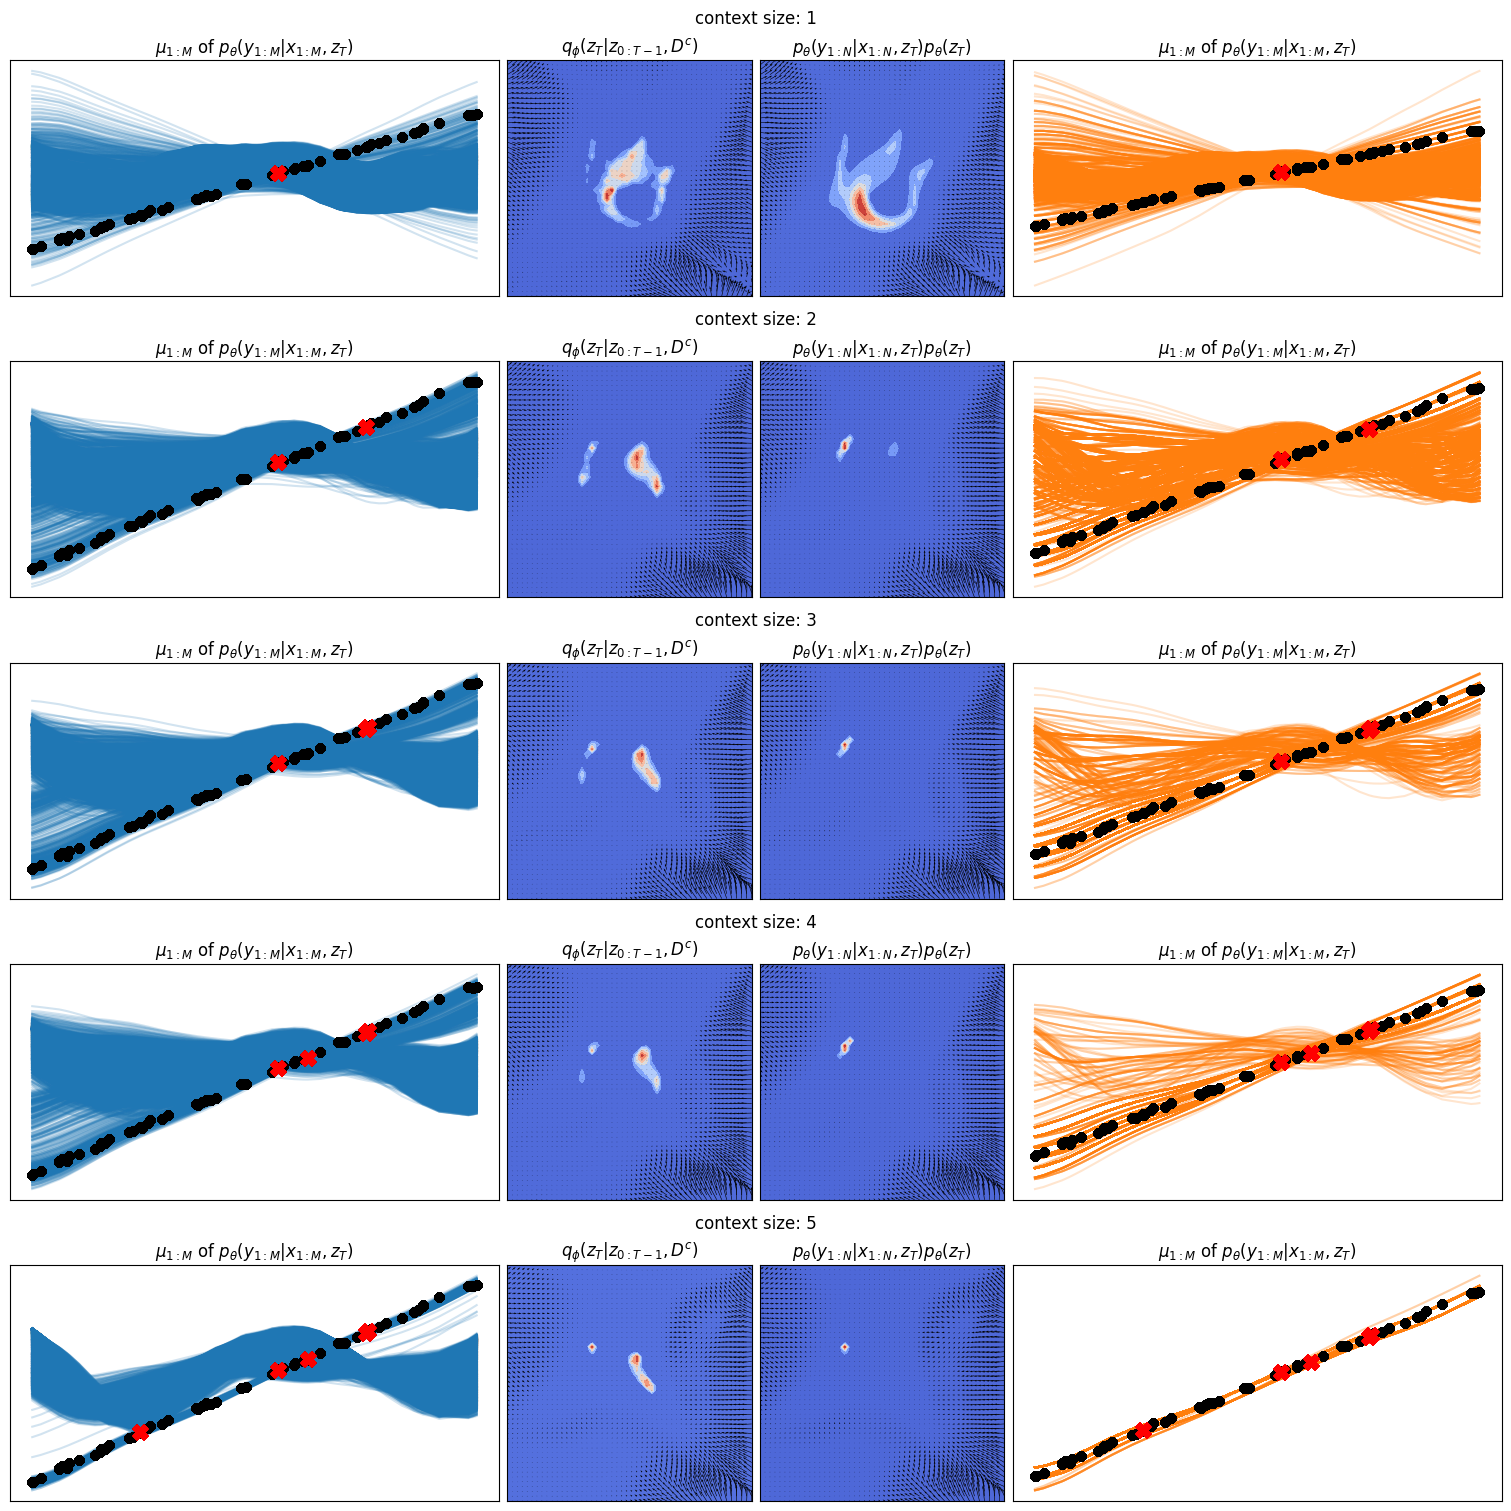

In [13]:
max_context_size = 5
num_samples = 2500

targets, samples = visualize_dvinp_both(
    device=device,
    dvinp=dvinp,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    ranges=[(-5, 5), (-5, 5)],
)

In [8]:
!jupyter nbconvert --to script eval_bml.ipynb

[NbConvertApp] Converting notebook eval_bml.ipynb to script
[NbConvertApp] Writing 1614 bytes to eval_bml.py
